# Feed Forward Neural Network

In this notebook, we will perform a multi-layer feed-forward Neural Network using the MNIST dataset.\
This this we will perform:
- MNIST dataset
- DataLoader, Transformation
- Multi-layer Neural Network, Activation Functions
- Loss and Optimizer
- Batch Training 
- Model Evaluation and Accuracy
- GPU support

In [1]:
# import the libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# hyperparameters
input_size = 784 # 28x28
hidden_size = 100
n_classes = 10
n_epoch = 8
batch_size = 100
learning_rate = 0.001

In [4]:
# import dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                            transform=transforms.ToTensor())

In [5]:
# prepare the data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


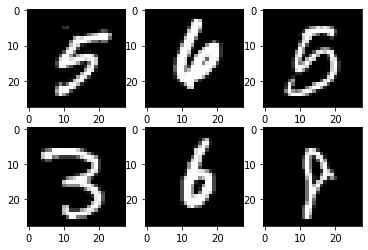

In [7]:
# plot a few samples
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [8]:
# create a Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, n_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, n_classes)

In [9]:
# set the loss function and the optimizer
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(n_epoch):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criteria(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1}/{n_epoch}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")
        

epoch 1/8, step 100/600, loss = 0.4672
epoch 1/8, step 200/600, loss = 0.3010
epoch 1/8, step 300/600, loss = 0.3115
epoch 1/8, step 400/600, loss = 0.1835
epoch 1/8, step 500/600, loss = 0.2341
epoch 1/8, step 600/600, loss = 0.3542
epoch 2/8, step 100/600, loss = 0.1435
epoch 2/8, step 200/600, loss = 0.1991
epoch 2/8, step 300/600, loss = 0.2104
epoch 2/8, step 400/600, loss = 0.1880
epoch 2/8, step 500/600, loss = 0.0927
epoch 2/8, step 600/600, loss = 0.0841
epoch 3/8, step 100/600, loss = 0.1271
epoch 3/8, step 200/600, loss = 0.0864
epoch 3/8, step 300/600, loss = 0.1222
epoch 3/8, step 400/600, loss = 0.1706
epoch 3/8, step 500/600, loss = 0.1181
epoch 3/8, step 600/600, loss = 0.1598
epoch 4/8, step 100/600, loss = 0.1333
epoch 4/8, step 200/600, loss = 0.0622
epoch 4/8, step 300/600, loss = 0.0737
epoch 4/8, step 400/600, loss = 0.0949
epoch 4/8, step 500/600, loss = 0.1362
epoch 4/8, step 600/600, loss = 0.0755
epoch 5/8, step 100/600, loss = 0.1776
epoch 5/8, step 200/600, 

In [12]:
# test and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy = {acc}")

Accuracy = 97.37
